<a href="https://colab.research.google.com/github/TNaokun/GFPGAN/blob/master/GFPGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title #**setup**

# --- GFPGAN setup ---
# Clone GFPGAN
%cd /content
!rm -rf GFPGAN
#!git clone https://github.com/cedro3/GFPGAN.git
!git clone https://github.com/TNaokun/GFPGAN.git
%cd GFPGAN

# install library
!pip install basicsr==1.4.2
!pip install facexlib
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan
!pip install ffmpeg  
!pip install yt_dlp

# Download the pre-trained model
!wget https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth -P experiments/pretrained_models

# add function
from function import display_pic, reset_folder, comp_display


# --- DeOldify setup ---
# Clone DeOldify
%cd /content
!rm -rf DeOldify
!git clone https://github.com/jantic/DeOldify.git
%cd DeOldify

#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId

#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)
import torch
if not torch.cuda.is_available():
    print('GPU not available.')

# install library
! pip install -r colab_requirements.txt

# import library
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

# download models
! mkdir 'models'
! wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

# download watermark
! wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

# load model
colorizer = get_image_colorizer(artistic=True)


/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 489, done.
remote: Counting objects: 100% (489/489), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 489 (delta 242), reused 464 (delta 235), pack-reused 0
Receiving objects: 100% (489/489), 14.35 MiB | 15.54 MiB/s, done.
Resolving deltas: 100% (242/242), done.
/content/GFPGAN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
running develop
running egg_info
creating gfpgan.egg-info
writing gfpgan.egg-info/PKG-INFO
writing dependency_links to gfpgan.egg-info/dependency_links.txt
writing requirements to gfpgan.egg-info/requires.txt
writing top-level names to gfpgan.egg-info/top_level.txt
writing manifest file 'gfpgan.egg-info/SOURCES.txt'
reading manifest temp

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.
--2022-09-27 09:41:58--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 5.9.140.253
Connecting to data.deepai.org (data.deepai.org)|5.9.140.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  15.2MB/s    in 17s     

2022-09-27 09:42:16 (14.1 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]

--2022-09-27 09:42:16--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-09-27 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weigh

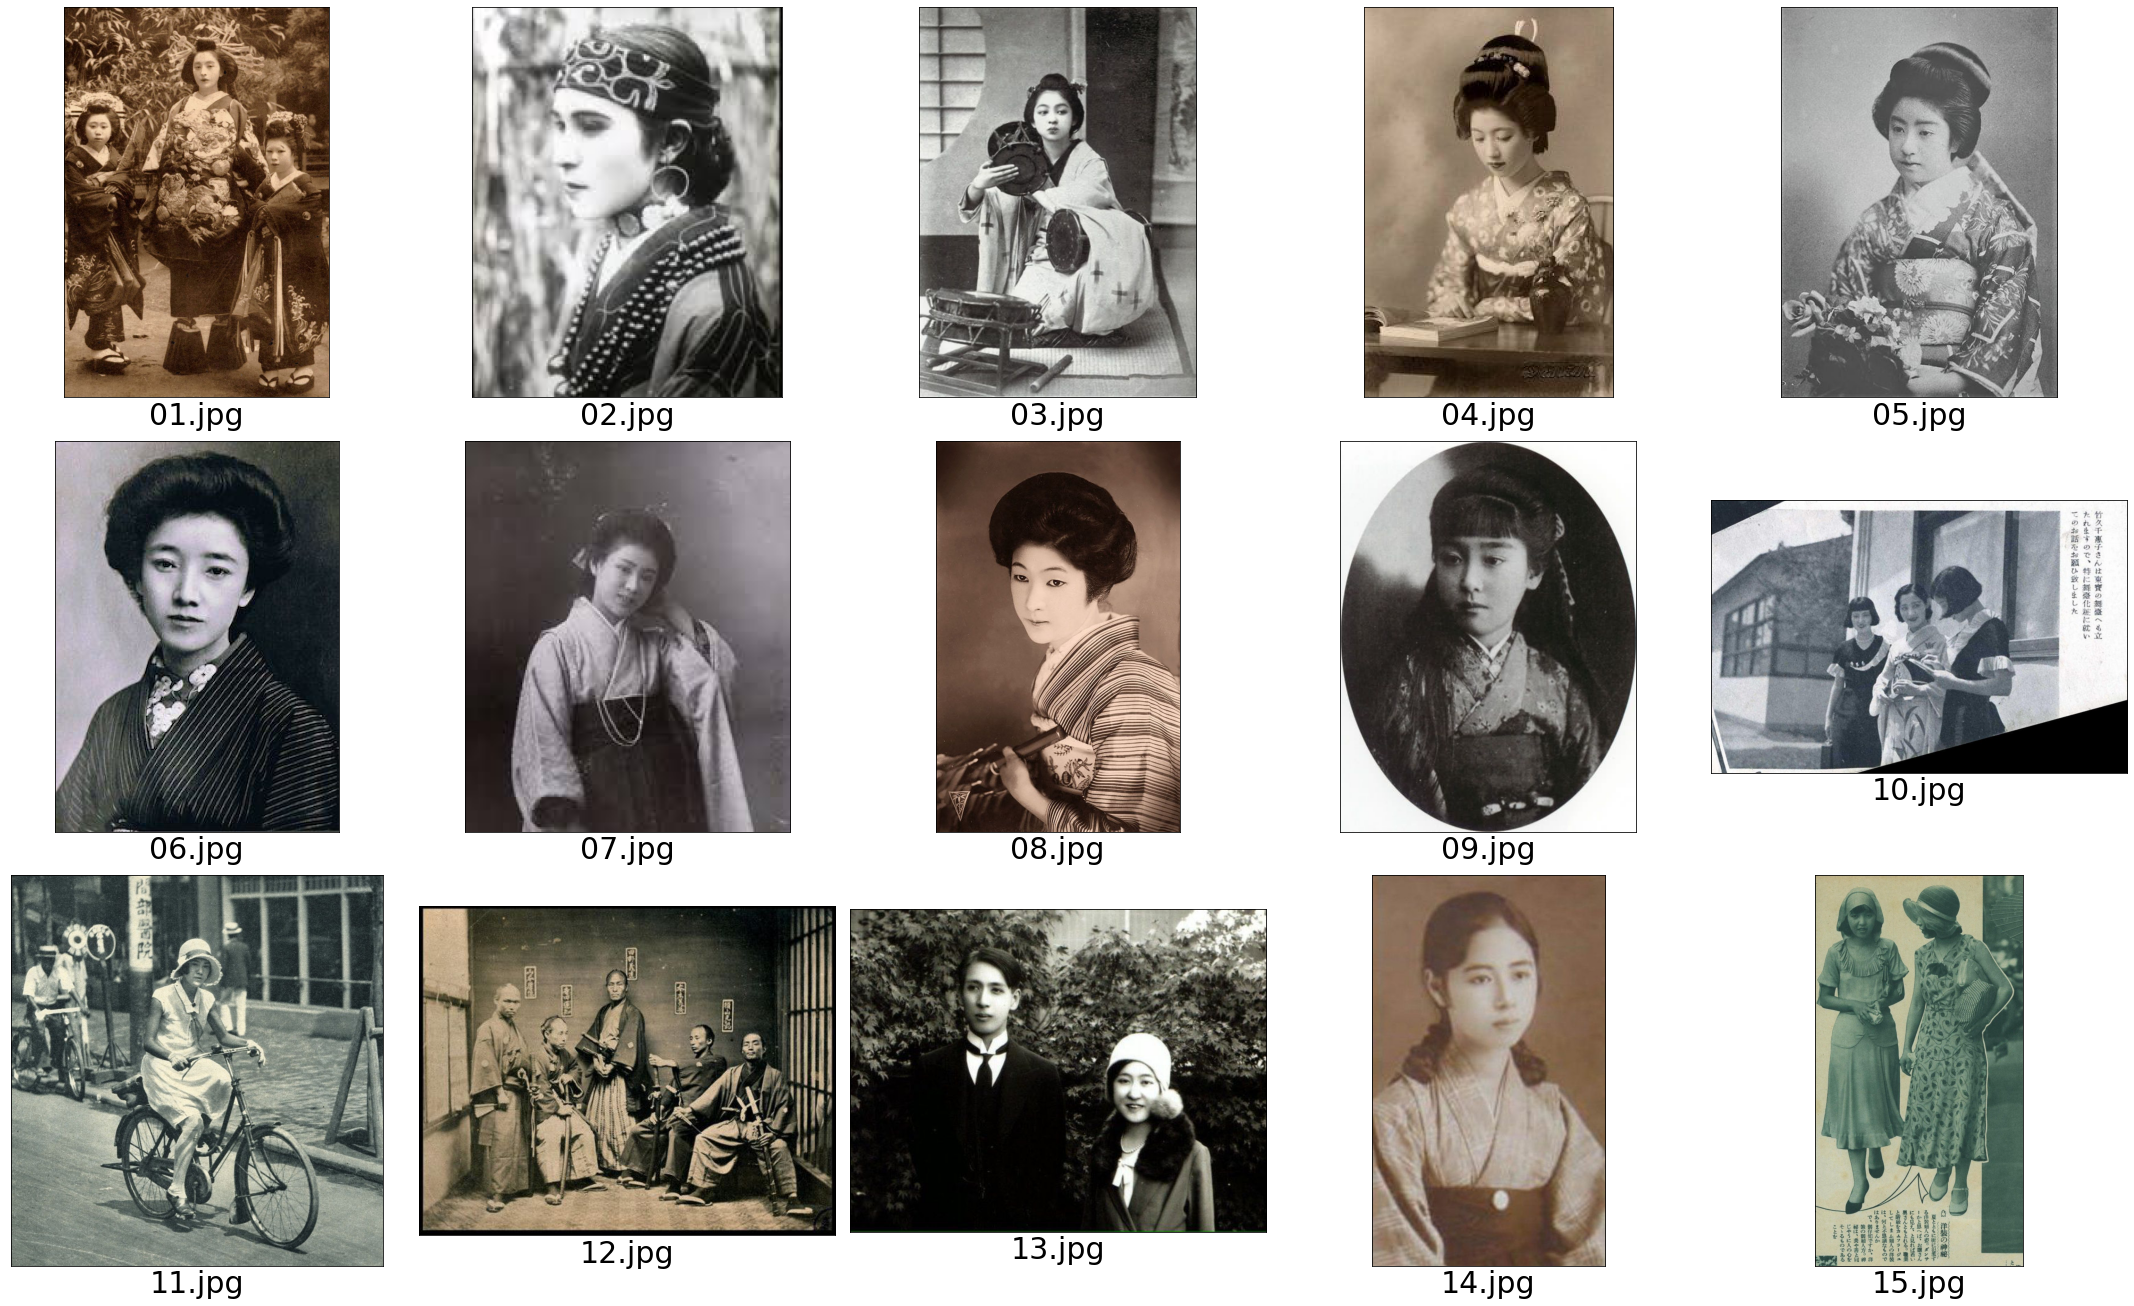

In [2]:
#@title #**display sample picture**
display_pic('/content/GFPGAN/images')

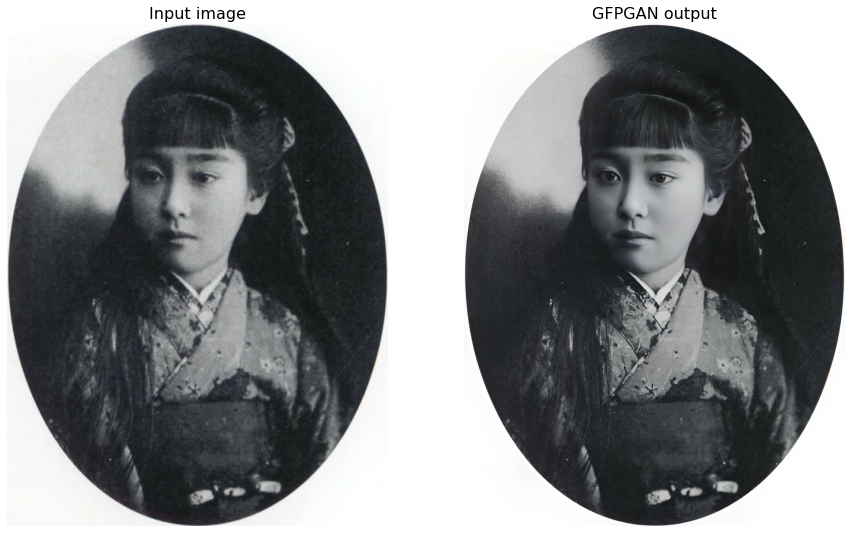

In [3]:
#@title #**GFPGAN**
%cd /content/GFPGAN
!rm -rf results
picture = '09.jpg'#@param {type:"string"}
input_path = 'images/'+ picture

!python inference_gfpgan.py -i $input_path -o results -v 1.3 -s 2 --bg_upsampler realesrgan

# display befor & after
from IPython.display import clear_output
clear_output()
img_input = cv2.imread('images/'+picture)
img_output = cv2.imread('results/restored_imgs/'+picture)
comp_display(img_input, img_output)

/content/DeOldify


PosixPath('result_images/09.jpg')

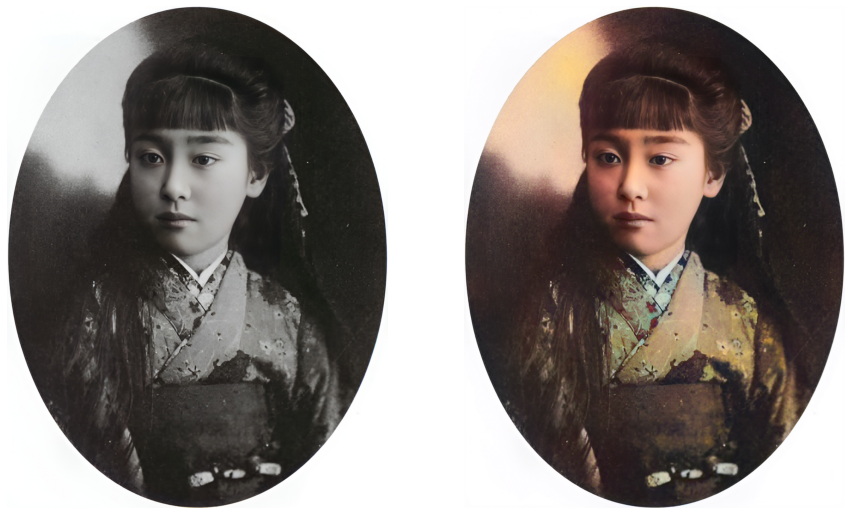

In [4]:
#@title #**DeOldify**

# copy image
%cd /content/DeOldify
import shutil

pic = '/content/GFPGAN/results/restored_imgs/'+picture
dst_pic = '/content/DeOldify/test_images/'+picture
shutil.copy(pic, dst_pic)


# DeOldify
file_path = 'test_images/'+picture
render_factor = 35 

colorizer.plot_transformed_image(file_path,\
                                  render_factor= render_factor,\
                                  watermarked = False,\
                                  display_render_factor=False,\
                                  compare=True,\
                                  figsize=(15,15))

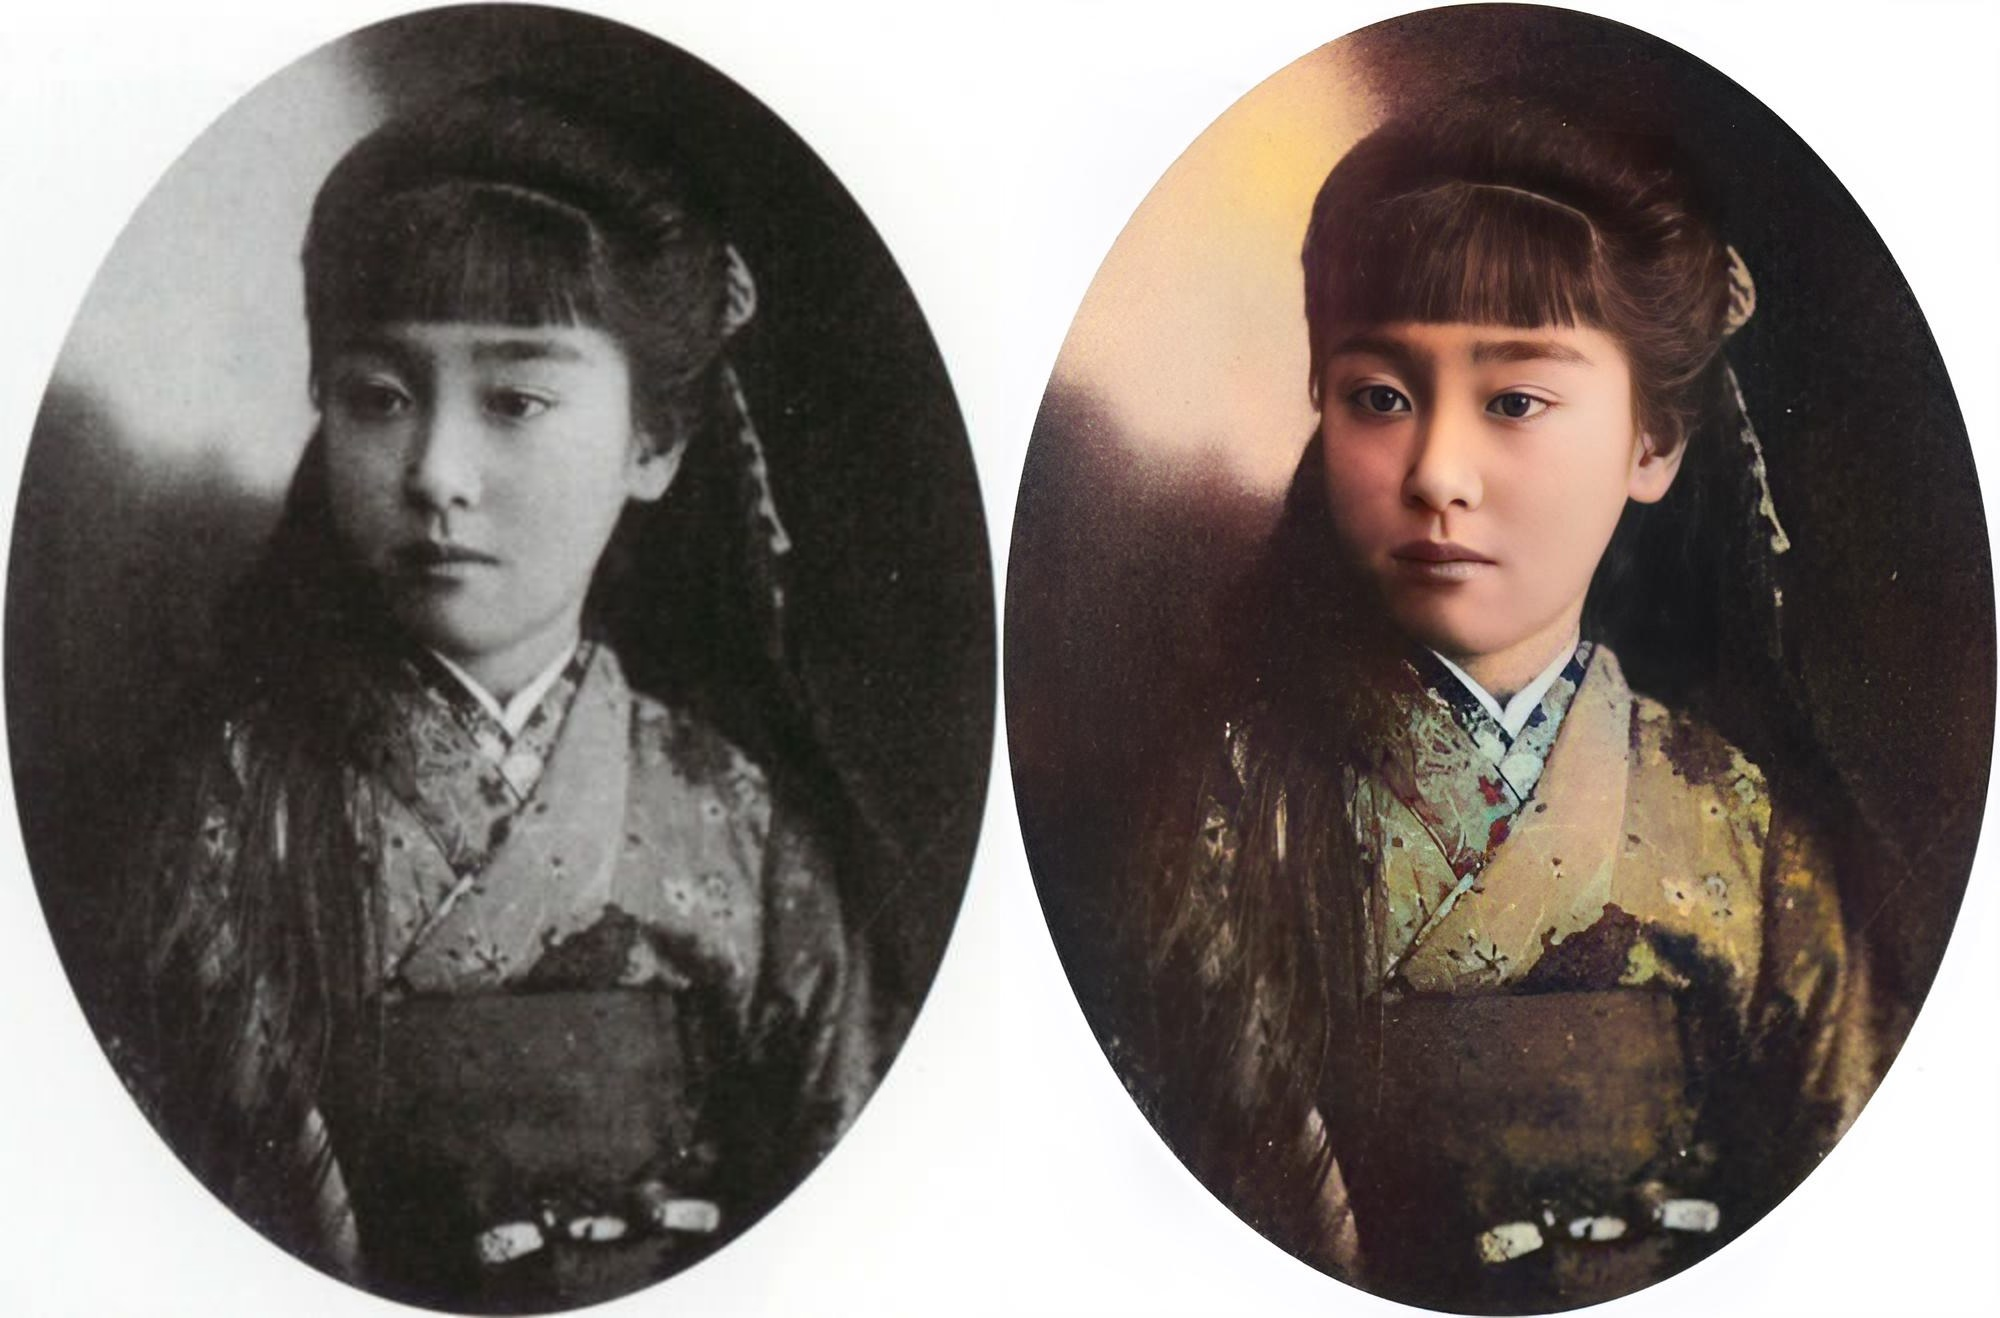

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
#@title #**final comparison image**

# concatenate pre-conversion and post-conversion images
reset_folder('compare_images')
mono = cv2.imread('/content/GFPGAN/images/'+picture)
tmp = cv2.imread('/content/GFPGAN/results/restored_imgs/'+picture)
color = cv2.imread('/content/DeOldify/result_images/'+picture)
height, width ,channels =tmp.shape
mono = cv2.resize(mono, dsize=(width, height))
color = cv2.resize(color, dsize=(width, height))

if height > width:
  result = cv2.hconcat([mono, color])
else:
  result = cv2.vconcat([color, mono])  
cv2.imwrite('compare_images/fine'+picture, result)

# display
from IPython.display import display
from IPython.display import Image as show_img
display(show_img('compare_images/fine'+picture))

# auto-download
from google.colab import files
files.download('compare_images/fine'+picture)

In [13]:
#!git config --global user.email "yositaka.y@gmail.com"
#!git config --global user.name "TNaokun"
#!git commit -m 'modyfi import libyrary'
!git push origin master
#!git remote -v

fatal: could not read Username for 'https://github.com': No such device or address


In [6]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   resource_images/watermark.png

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	compare_images/

no changes added to commit (use "git add" and/or "git commit -a")
